In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imsave
%matplotlib inline

In [2]:
def gaussian_kernel_2D(ksize, s):
    offset = int(ksize / 2)
    res = np.zeros((ksize, ksize))
    for i in range(-offset, offset + 1):
        for j in range(-offset, offset + 1):
            res[i + offset][j + offset] = np.exp(-(i ** 2 + j ** 2) / (2 * s ** 2)) / (2 * np.pi * s ** 2)
    res = res / np.sum(res)
    #print(res)
    #print(np.sum(res))
    return res

In [3]:
def findCornersGaussianWindow(image, window_size, ksize, k, std) :
    """
    Finds the corners in the image using Gaussian window.

    Parameters
    ----------
    image : (N,M) ndarray
        Input image
    window_size : Integer
        It is the size of neighbourhood considered for corner detection
    ksize : Integer 
        Aperture parameter of Sobel derivative used.
    k : Float
        Harris detector free parameter in the equation.
    std : Int
        Standard deviation used by Gaussian Kernel
    
    Returns
    -------
    
    corner_list : List
        List containing the R values of all points
    
    """  
    
    #Calculating the gradient
    dx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = ksize)
    dy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = ksize)
    
    #List which will have co ordinates of all the corners
    cornerList = []
    
    Ixx = dx**2
    Iyy = dy**2
    Ixy = dx*dy
    
    height, width = image.shape
    
    offset = window_size/2
    
   
    #Calling function to get 2D gaussian kernel of required size
    Gaussian_weights = gaussian_kernel_2D(window_size,std)
            
    for i in range(offset, height - offset) :
        for j in range(offset, width - offset) :
            
    #Here the window used is a matrix with all ones, so directly sum can be taken 
            Ix_window = Ixx[i-offset:i+offset+1, j-offset:j+offset+1]
            Iy_window = Iyy[i-offset:i+offset+1, j-offset:j+offset+1]
            Ixy_window = Ixy[i-offset:i+offset+1, j-offset:j+offset+1] 
            
           # print(Ix_window.shape)
           # print()
            Ix_weighted = Ix_window * Gaussian_weights
            Iy_weighted = Iy_window * Gaussian_weights
            Ixy_weighted = Ixy_window * Gaussian_weights
            
            Sxx = np.sum(Ix_weighted)
            Syy = np.sum(Iy_weighted)
            Sxy = np.sum(Ixy_weighted)
            
    # Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)
           
            cornerList.append([i,j,r])
            
    return cornerList;

In [4]:
def cornerColorImage(image, corner_array, threshold,window_size) :
    """
    Marks the corners in given Image
    
    parameters
    ----------
    image : (N,M) ndarray
        Input image
    corner_arry : (N,3) ndarray
        Has co-ordinates and their corresponding R values
    threshold : Float or Int
        Threshold which is used for classifying whether it's corner or not
    window_size : Int
        It is the size of neighbourhood considered for corner detection
    
    Returns
    -------
    image : (N,M) ndarray
        Image with corners marked with Red Color
    no_of_corners : Int
        No of Corners found in the image
    cornerList : List
    List containing co ordinates of actual corners
    """
    corners = []
    #Creating a copy of the image to mark the corner pixels
    newImg = image.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = window_size/2
    height, width = image.shape
    
    count = 0;
    no_of_corners = 0
    for i in range(offset, height - offset) :
        for j in range(offset, width - offset) :
            
            if( corner_array[count][2] > threshold ) :
                color_img.itemset((i, j, 0), 255)
                color_img.itemset((i, j, 1), 0)
                color_img.itemset((i, j, 2), 0)
                no_of_corners = no_of_corners + 1
                corners.append([i,j,corner_array[count][2]])
            count = count + 1
    return color_img, no_of_corners,corners

In [145]:
def plotCommonCorners(points, image) :
    image1 = image
    num = points.shape[0]
    for i in range(num) :
        for j in range(5):
            for k in range(5):
                image1[points[i][0] + j][points[i][1] + k][0] = 0
                image1[points[i][0] + j][points[i][1] + k][1] = 0
                image1[points[i][0] + j][points[i][1] + k][2] = 255
    return image1

In [9]:
def noiseReductionUsingGaussian(image, Kx = 5, Ky = 5) :
    """
    Performs Gaussian Blurring
    
    Parameters
    ----------
    image : (M,N) ndarray
        Input image
    Kx : Int
        Kernel size in X direction
    Ky : Int
        Kernel size in Y direction
   
    Returns
    -------
    image : (M, N) ndarray
        Image after smoothing.
    """
    blur = cv2.GaussianBlur(image,(Kx,Ky),0)
    return blur

In [10]:
def writingIntoFile(points, filename) :
    f = open(filename, 'w' )
    for i in range(len(points)):
        f.write( repr(points[i])+'\n' )
    f.close()

In [11]:
original_image1 = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment2/resized_image1.png",0)

In [12]:
original_image2 = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment2/resized_image2.png",0)

In [146]:
color_image1 = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment2/resized_image1.png")

In [147]:
color_image2 = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment2/resized_image2.png")

In [22]:
image1 = noiseReductionUsingGaussian(original_image1, 3, 3)
image2 = noiseReductionUsingGaussian(original_image2, 3, 3)

In [23]:
corners1 = findCornersGaussianWindow(image1,3,3,0.04,1)

In [24]:
corners1 = np.array(corners1)

In [88]:
corner_image,number,corner_list1 = cornerColorImage(image1,corners1, 0.01*np.max(corners1[:,2]),3)

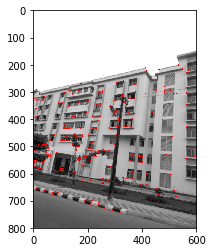

In [89]:
plt.imshow(corner_image)

In [90]:
imsave("corner1.png",corner_image)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [91]:
writingIntoFile(corner_list1,'corner1.txt')

In [92]:
len(corners1)

477204

In [93]:
number

9293

In [94]:
corner2 = findCornersGaussianWindow(image2, 3, 3, 0.04, 1)


In [95]:
corners2 = np.array(corner2)

In [97]:
corner_image2,number,corner_list2 = cornerColorImage(image2,corners2, 0.01*np.max(corners2[:,2]),3)

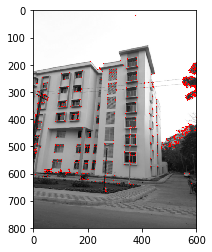

In [98]:
plt.imshow(corner_image2)

In [99]:
imsave("corner2.png",corner_image2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [123]:
writingIntoFile(corner_list2,'corner2.txt')

In [132]:
cpoints1 = np.array([[213, 410],[168,527],[399, 363],[497,557],[600,503],[597,462],[567,558],
                     [618,555],[542,556],[460,506],[238,481],[279,478],
                    [232,517],[273,517],[193,562],[402,471],[516,465],[276,258],[457,252],[249,281],[428,360],
                     [402,282],[340,510]])

In [133]:
cpoints2 = np.array([[189,209],[152, 314],[372, 165],[456, 334],[552,291],[552,256],[520,335],
                    [564,332],[494,332],[428,296],[217,277],[259,273],[216,304],
                    [253,304],[178,342],[373,267],[475,261],[243,58],[435,54],[222,182],[404,165],[378,84],
                     [317,302]])

In [34]:
def get_perspective_transform_matrix(a,b):
    num = a.shape[0]
    assert(a.shape[0]==b.shape[0])
    A = np.zeros((2*num,9))
    a = np.array(a)
    b = np.array(b)
    for i in range(num):
        x,y = a[i][0],a[i][1]
        u,v = b[i][0],b[i][1]
        A[2*i] = [-x,-y,-1,0,0,0,u*x,u*y,u]
        A[2*i+1] = [0,0,0,-x,-y,-1,v*x,v*y,v]
    U,S,V = np.linalg.svd(A)
    print("This value should be close to zero: "+str(np.sum(np.dot(A,V[8]))))
    H = V[8].reshape((3,3))        
    return H 

In [35]:
H = get_perspective_transform_matrix(cpoints1, cpoints2)

This value should be close to zero: 0.000756454516664


In [36]:
H

array([[  4.16340687e-03,   6.77276814e-04,  -4.13838110e-01],
       [  1.28699197e-04,   4.19278250e-03,  -9.10325879e-01],
       [  5.41102325e-07,   1.98738562e-06,   3.06992525e-03]])

In [37]:
H = (H/H[2][2])

In [38]:
H

array([[  1.35619161e+00,   2.20616712e-01,  -1.34803969e+02],
       [  4.19225832e-02,   1.36576045e+00,  -2.96530308e+02],
       [  1.76259121e-04,   6.47372641e-04,   1.00000000e+00]])

In [39]:
t = np.array([[213], [410], [1]])

In [40]:
temp = np.dot(H,t)

In [41]:
temp

array([[ 244.51769547],
       [ 272.36098816],
       [   1.30296598]])

In [42]:
rimg1 = image1
rimg2 = image2

In [158]:
def getPerspectiveImage(image1) :
    bunchX=[]; bunchY=[]
    tt = np.array([[0],[0],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[image1.shape[0]-1],[0],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[0],[image1.shape[1]-1],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[image1.shape[0]-1],[image1.shape[1]-1],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    refX1 = int(np.min(bunchX))
    refX2 = int(np.max(bunchX))
    refY1 = int(np.min(bunchY))
    refY2 = int(np.max(bunchY))

    
# Final image whose size is defined by the offsets previously calculated
    final = np.zeros((int(refX2-refX1),int(refY2-refY1)+image2.shape[1],3)).astype(np.uint8)
# Iterate over the image to transform every pixel
    for i in range(image1.shape[0]):
            for j in range(image1.shape[1]):
                tt = np.array([[i],[j],[1]])
                tmp = np.dot(H,tt)
                x1=int(tmp[0]/tmp[2])-refX1
                y1=int(tmp[1]/tmp[2])-refY1

                if x1>0 and y1>0 and y1<refY2-refY1 and x1<refX2-refX1:
                        final[x1,y1]= image1[i][j]
    return final

In [43]:
def apply_transform(image1, image2):
    bunchX=[]; bunchY=[]
    tt = np.array([[0],[0],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[image1.shape[0]-1],[0],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[0],[image1.shape[1]-1],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    tt = np.array([[image1.shape[0]-1],[image1.shape[1]-1],[1]])
    tmp = np.dot(H,tt)
    bunchX.append(tmp[0]/tmp[2])
    bunchY.append(tmp[1]/tmp[2])

    refX1 = int(np.min(bunchX))
    refX2 = int(np.max(bunchX))
    refY1 = int(np.min(bunchY))
    refY2 = int(np.max(bunchY))

    
# Final image whose size is defined by the offsets previously calculated
    final = np.zeros((int(refX2-refX1),int(refY2-refY1)+image2.shape[1],3)).astype(np.uint8)
# Iterate over the image to transform every pixel
    for i in range(image1.shape[0]):
            for j in range(image1.shape[1]):
                tt = np.array([[i],[j],[1]])
                tmp = np.dot(H,tt)
                x1=int(tmp[0]/tmp[2])-refX1
                y1=int(tmp[1]/tmp[2])-refY1

                if x1>0 and y1>0 and y1<refY2-refY1 and x1<refX2-refX1:
                        final[x1,y1]= image1[i][j]
    for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            if np.array_equal(final[i-refX1,j-refY1],np.array([0,0,0])):
                final[i-refX1][j-refY1]=image2[i][j]
                
    print(refX1)
    print(refY1)
    return final

In [159]:
perspective = getPerspectiveImage(color_image1)

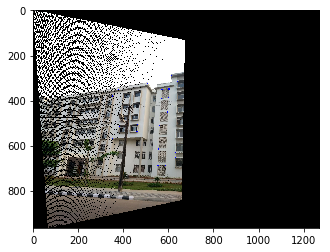

In [160]:
plt.imshow(perspective)

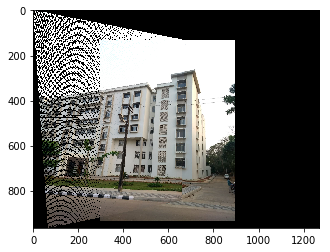

In [47]:
plt.imshow(final)

In [148]:
c1 = plotCommonCorners(cpoints1,color_image1)

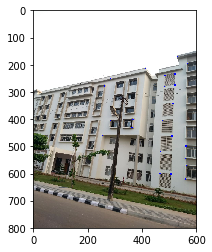

In [149]:
plt.imshow(color_image1)

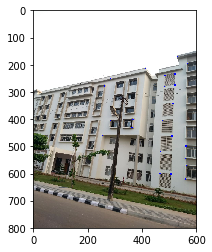

In [150]:
plt.imshow(c1)

In [151]:
imsave("common_corners_1.png",c1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [152]:
cv2.imwrite("common_corners1.png",c1)

True

In [153]:
c2 = plotCommonCorners(cpoints2, color_image2)

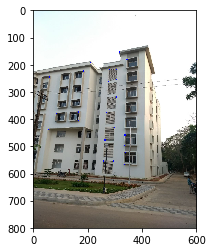

In [154]:
plt.imshow(c2)

In [155]:
imsave("common_corners_2.png",c2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [156]:
cv2.imwrite("common_corners2.png",c2)

True

In [152]:
imsave("stitched_image.png", final)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
